# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
%matplotlib inline

# Making the figsize larger for all the plots
plt.rcParams["figure.figsize"] = [16,9]

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cities_df = pd.DataFrame(cities)
cities_df.count()

0    613
dtype: int64

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [7]:
# Setting up DataFrame for API call
col_names = ['City','Country','Date','Cloudiness','Humidity','Latitude','Longitude','Max Temp','Wind Speed']

col_df = pd.DataFrame(columns=col_names)

url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID='
key = api_keys.api_key

weather_df = pd.concat([cities_df,col_df])
weather_df['City'] = weather_df[0]
weather_df = weather_df.drop([0],axis=1)
weather_df.count()

City          613
Country         0
Date            0
Cloudiness      0
Humidity        0
Latitude        0
Longitude       0
Max Temp        0
Wind Speed      0
dtype: int64

In [8]:
for index,row in weather_df.iterrows():
    r_city = row['City']
    try_url = url+key+'&q='+r_city
    req = requests.get(try_url).json()
    
    try:
        weather_df.at[index, 'Country'] = req['sys']['country']
        weather_df.at[index, 'Date'] = req['dt']
        weather_df.at[index, 'Cloudiness'] = req['clouds']['all']
        weather_df.at[index, 'Humidity'] = req['main']['humidity']
        weather_df.at[index, 'Latitude'] = req['coord']['lat']
        weather_df.at[index, 'Longitude'] = req['coord']['lon']
        weather_df.at[index, 'Max Temp'] = req['main']['temp_max']
        weather_df.at[index, 'Wind Speed'] = req['wind']['speed']
    except KeyError:
        # Not all records return data, this is to clean them out. Scubba Scrubba Rubba in the Tubba
        print(f'Dropping Record of: {r_city}')
        weather_df = weather_df.drop(index)
    print(f'Processing Record of: {r_city}')
weather_df = weather_df.reset_index(drop=True)
print("Records Complete")

Processing Record of: koumac
Processing Record of: touros
Processing Record of: ushuaia
Processing Record of: barrow
Processing Record of: tuktoyaktuk
Processing Record of: mahebourg
Processing Record of: fayaoue
Processing Record of: kapaa
Processing Record of: busselton
Dropping Record of: bengkulu
Processing Record of: bengkulu
Processing Record of: khatanga
Processing Record of: guerrero negro
Processing Record of: pisco
Processing Record of: avarua
Processing Record of: terekli-mekteb
Processing Record of: fort smith
Processing Record of: hermanus
Processing Record of: mahajanga
Processing Record of: mataura
Processing Record of: fez
Processing Record of: pevek
Processing Record of: atuona
Processing Record of: punta arenas
Processing Record of: naze
Processing Record of: nouakchott
Processing Record of: yellowknife
Processing Record of: kruisfontein
Processing Record of: kirakira
Processing Record of: dikson
Processing Record of: esperance
Processing Record of: carnarvon
Processi

In [9]:
weather_df.count()

City          545
Country       545
Date          545
Cloudiness    545
Humidity      545
Latitude      545
Longitude     545
Max Temp      545
Wind Speed    545
dtype: int64

In [10]:
weather_df.head(5)

,City,Country,Date,Cloudiness,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,koumac,NC,1554249092,76,76,-20.56,164.28,82.38,5.95
1,touros,BR,1554246000,0,88,-5.2,-35.46,80.6,6.93
2,ushuaia,AR,1554246000,75,70,-54.81,-68.31,44.6,10.29
3,barrow,AR,1554249093,0,65,-38.31,-60.23,62.13,10.98
4,tuktoyaktuk,CA,1554246000,40,70,69.44,-133.03,-2.21,11.41


In [11]:
weather_df.to_csv("../Data/weather_data.csv", encoding="utf-8", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

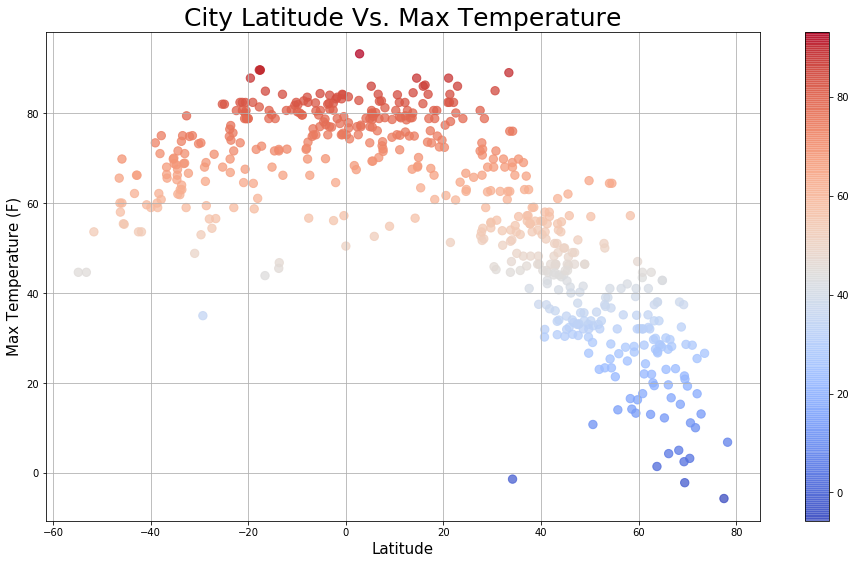

In [12]:
plt.scatter(weather_df['Latitude'],
           weather_df['Max Temp'],
           c=weather_df['Max Temp'],
           s=70,
           cmap='coolwarm',
           alpha=.75
           )
plt.ylabel('Max Temperature (F)',fontsize=15)
plt.xlabel('Latitude',fontsize=15)
plt.title('City Latitude Vs. Max Temperature',fontsize=25)
plt.grid(True)
plt.colorbar()
plt.savefig('../Data/LatVTemp');

#### Latitude vs. Humidity Plot

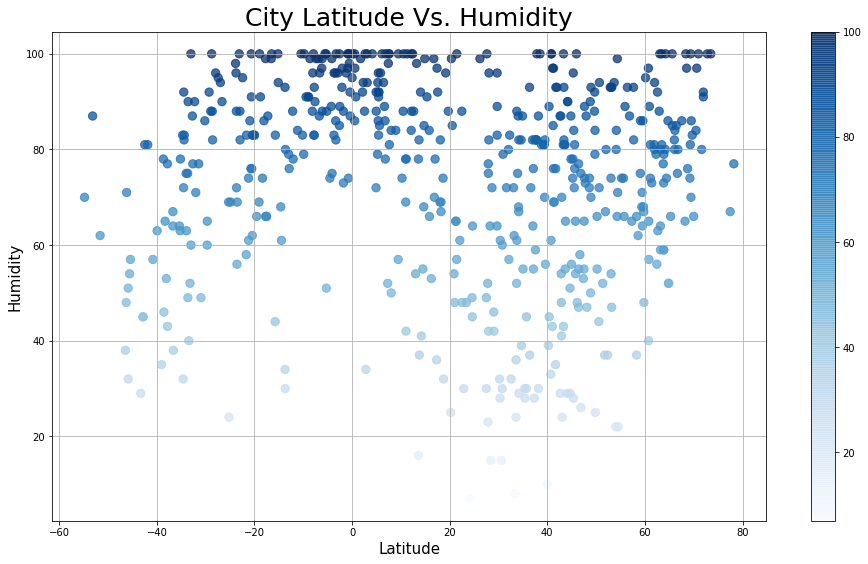

In [13]:
plt.scatter(weather_df['Latitude'],
           weather_df['Humidity'],
           c=weather_df['Humidity'],
           s=70,
           cmap='Blues',
           alpha=.75
           )
plt.ylabel('Humidity',fontsize=15)
plt.xlabel('Latitude',fontsize=15)
plt.title('City Latitude Vs. Humidity',fontsize=25)
plt.grid(True)
plt.colorbar()
plt.savefig('../Data/LatVHumidity');

#### Latitude vs. Cloudiness Plot

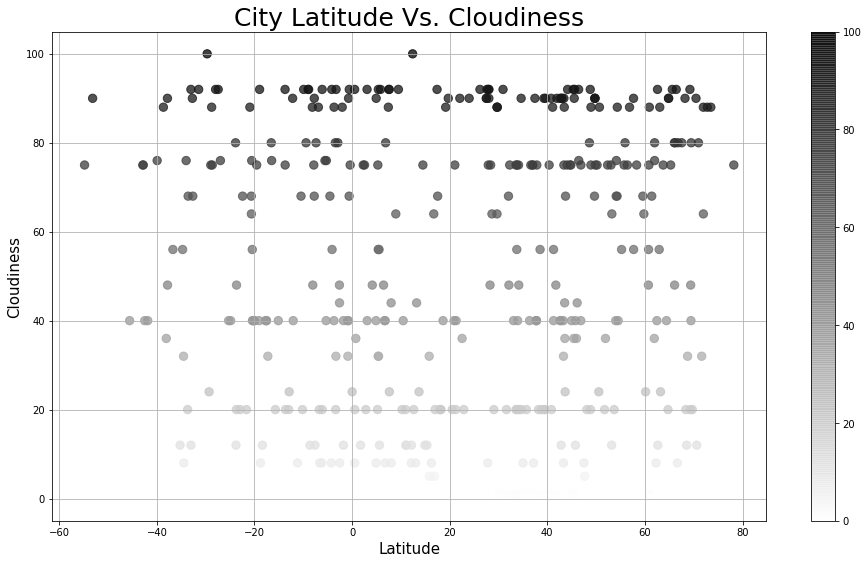

In [14]:

plt.scatter(weather_df['Latitude'],
           weather_df['Cloudiness'],
           c=weather_df['Cloudiness'],
           s=70,
           cmap='binary',
           alpha=.75
           )
plt.ylabel('Cloudiness',fontsize=15)
plt.xlabel('Latitude',fontsize=15)
plt.title('City Latitude Vs. Cloudiness',fontsize=25)
plt.grid(True)
plt.colorbar()
plt.savefig('../Data/LatVCloud');

#### Latitude vs. Wind Speed Plot

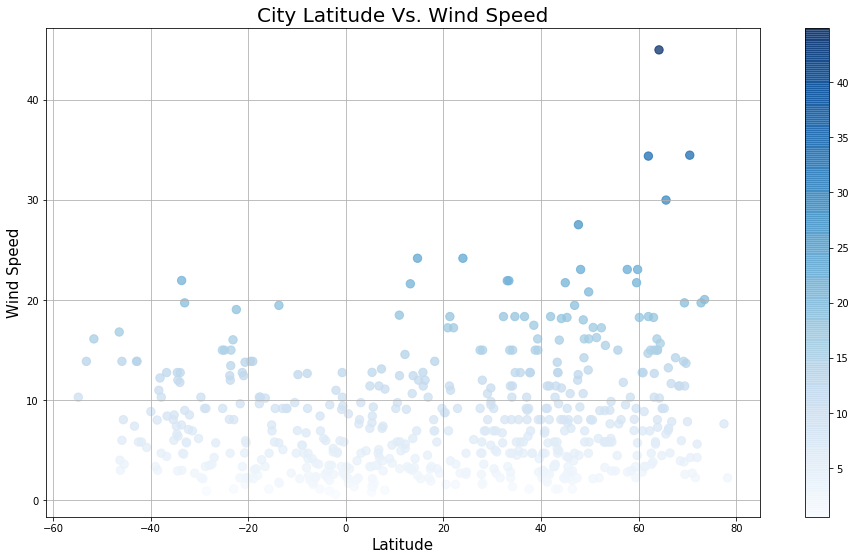

In [15]:
plt.scatter(weather_df['Latitude'],
           weather_df['Wind Speed'],
           c=weather_df['Wind Speed'],
           s=70,
           cmap='Blues',
           alpha=.75
           )
plt.ylabel('Wind Speed',fontsize=15)
plt.xlabel('Latitude',fontsize=15)
plt.title('City Latitude Vs. Wind Speed',fontsize=20)
plt.grid(True)
plt.colorbar()
plt.savefig('../Data/LatVWindSpeed');